In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
traindata = pd.read_csv("C:/Users/in_q/book/train.csv")

#칼럼명 확인
col_name=traindata.columns
print(col_name)

# 칼럼수 확인
print(traindata.shape)
# 칼럼 데이터 type확인
print(traindata.dtypes)

traindata.head()

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')
(871393, 10)
ID                      object
User-ID                 object
Book-ID                 object
Book-Rating              int64
Age                    float64
Location                object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
dtype: object


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [14]:
# 결측치 확인 
print(traindata.isnull().sum())

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


In [13]:
#Year-Of-Publication의 -1의 값이 결측 또는 알 수 없음 
index=traindata.index[traindata['Year-Of-Publication'] == -1 ]
print(index)
traindata.loc[index]

Index([   184,    186,    191,    231,    290,    302,    331,    454,    500,
          521,
       ...
       870657, 870658, 870664, 870672, 870684, 870700, 870751, 870776, 870895,
       871300],
      dtype='int64', length=11515)


,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
184,TRAIN_000184,USER_00049,BOOK_121460,0,37.0,"gaylord, michigan, usa",Bxc Blue Bay Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
186,TRAIN_000186,USER_00049,BOOK_175661,10,37.0,"gaylord, michigan, usa",Lighthouse Mystery,Gertrude C Warner,-1.0,Scholastic Inc
191,TRAIN_000191,USER_00049,BOOK_230275,0,37.0,"gaylord, michigan, usa",Mike's Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
231,TRAIN_000231,USER_00054,BOOK_122689,0,39.0,"spring, texas, usa",Charming Billy,Alice Mcdermott,-1.0,"Farrar, Straus Giroux"
290,TRAIN_000290,USER_00060,BOOK_165427,0,27.0,"los angeles, california, usa",Moon Palace,Paul Auster,-1.0,Faber Faber Inc
...,...,...,...,...,...,...,...,...,...,...
870700,TRAIN_870700,USER_92056,BOOK_093874,5,35.0,"leucadia, california, usa",High Ground,John Mcgahern,-1.0,Faber Faber Inc
870751,TRAIN_870751,USER_92058,BOOK_117063,0,24.0,"halifax, nova scotia, canada",Hotel Du Lac,Anita Brookner,-1.0,Penguin Putnam~trade
870776,TRAIN_870776,USER_92058,BOOK_181486,8,24.0,"halifax, nova scotia, canada",Laurels Kitchen a Handbook for Vegetarian Co,Laurel Robertson,-1.0,Bantam Doubleday Dell
870895,TRAIN_870895,USER_92080,BOOK_045027,10,35.0,"brookhaven, mississippi, usa",Best of Sisters In Crime,Marilyn Wallace,-1.0,Penguin Putnam~childrens Hc


<Axes: xlabel='Book-Rating', ylabel='count'>

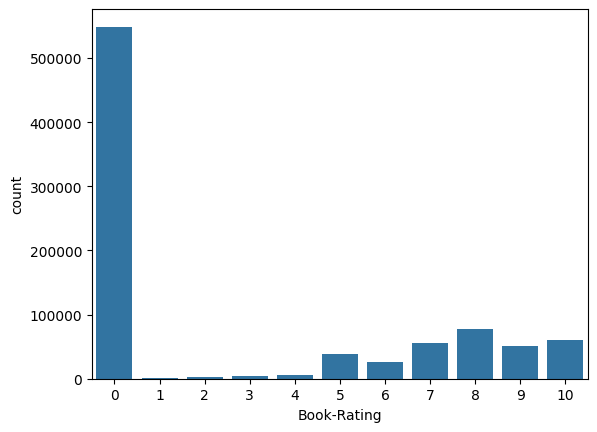

In [23]:
rating=traindata['Book-Rating'].value_counts().reset_index()

sns.barplot(x='Book-Rating' , y='count' , data= rating)

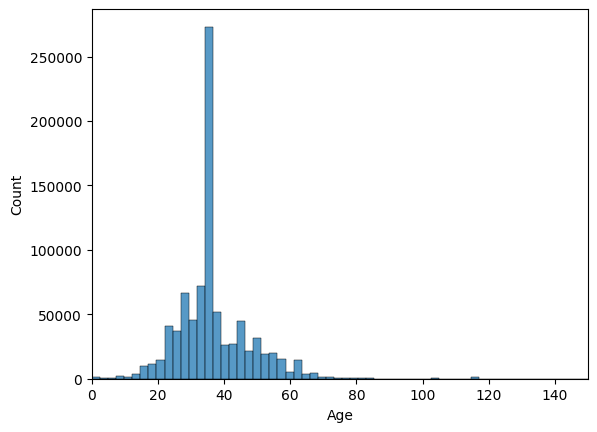

In [33]:
sns.histplot(traindata['Age'],bins =100)
plt.xlim(0,150)
plt.show()

<Axes: xlabel='Book-Rating', ylabel='Age'>

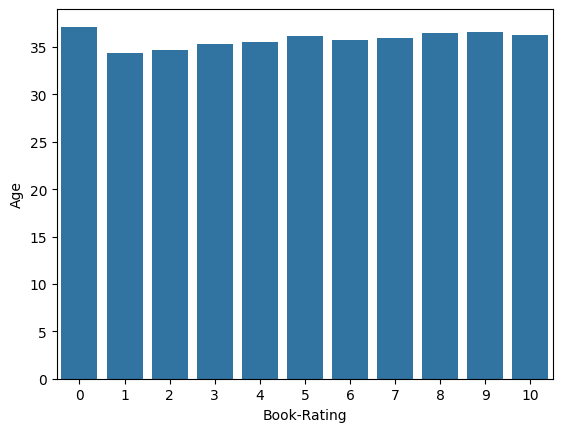

In [29]:
Rating_Age = traindata.groupby('Book-Rating')['Age'].mean().reset_index()
sns.barplot(x = 'Book-Rating', y = 'Age', data= Rating_Age)

In [71]:
locationdata=traindata['Location'].unique()
print(len(locationdata))
locationcount=traindata['Location'].value_counts().sort_values(ascending = False)
locationcount.head()

20971


Location
toronto, ontario, canada    12267
n/a, n/a, n/a               11161
chicago, illinois, usa       7214
seattle, washington, usa     6967
ottawa, ontario, canada      6915
Name: count, dtype: int64

In [72]:
titledata=traindata['Book-Title'].unique()
print(len(titledata))
titlecount=traindata['Book-Title'].value_counts().sort_values(ascending = False)
titlecount.head()

217829


Book-Title
Wild Animus                   2502
The Da Vinci Code              895
The Nanny Diaries: A Novel     828
The Lovely Bones: A Novel      768
A Painted House                761
Name: count, dtype: int64

In [73]:
authordata = traindata['Book-Author'].unique()
print(len(authordata))
authorcount = traindata['Book-Author'].value_counts().sort_values(ascending = False)
authorcount.head()

92635


Book-Author
Stephen King          8467
Nora Roberts          6934
John Grisham          5283
James Patterson       5020
Mary Higgins Clark    3983
Name: count, dtype: int64

In [74]:
publisherdata = traindata['Publisher'].unique()
print(len(publisherdata))
publishercount = traindata['Publisher'].value_counts().sort_values(ascending = False)
publishercount.head()

15505


Publisher
Ballantine Books            29696
Pocket                      27212
Berkley Publishing Group    23647
Harlequin                   21362
Warner Books                21263
Name: count, dtype: int64

In [75]:
userdata = traindata['User-ID'].unique()
print(len(userdata))
usercount = traindata['User-ID'].value_counts().sort_values(ascending = False)
usercount.head()

83256


User-ID
USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_73501     4290
USER_03411     3453
Name: count, dtype: int64